In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
df=pd.read_csv('Default_Fin.csv')
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [7]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [8]:
df.tail()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0
9999,10000,0,2411.04,202355.40,0


In [10]:
df.shape

(10000, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [12]:
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [14]:
df.value_counts(['Defaulted?'])

Defaulted?
0             9667
1              333
dtype: int64

<AxesSubplot:xlabel='Defaulted?', ylabel='Count'>

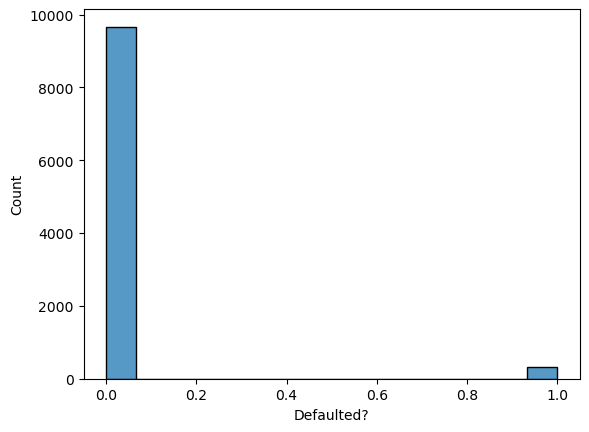

In [16]:
sns.histplot(x='Defaulted?',data=df)

In [17]:
y=df['Defaulted?']
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted?, Length: 10000, dtype: int64

In [19]:
x=df.drop(['Index','Defaulted?'],axis=1)
x

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00
...,...,...,...
9995,1,8538.72,635908.56
9996,1,9095.52,235928.64
9997,1,10144.92,703633.92
9998,1,18828.12,440029.32


In [20]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [21]:
x.shape,X_train.shape,X_test.shape

((10000, 3), (7500, 3), (2500, 3))

In [22]:
tree=DecisionTreeClassifier()

In [25]:
tree.fit(X_train,y_train)
X_train_pred=tree.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

tree.fit(X_test,y_test)
X_test_pred=tree.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 1.0
accuracy score of test data: 1.0


In [26]:
forest=RandomForestClassifier()

In [27]:
forest.fit(X_train,y_train)
X_train_pred=forest.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

forest.fit(X_test,y_test)
X_test_pred=forest.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 1.0
accuracy score of test data: 1.0


In [28]:
logreg=LogisticRegression()

In [29]:
logreg.fit(X_train,y_train)
X_train_pred=logreg.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

logreg.fit(X_test,y_test)
X_test_pred=logreg.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.9678666666666667
accuracy score of test data: 0.9612


In [30]:
knn=KNeighborsClassifier()

In [31]:
knn.fit(X_train,y_train)
X_train_pred=knn.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

knn.fit(X_test,y_test)
X_test_pred=knn.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

accuracy score of trained data: 0.9761333333333333
accuracy score of test data: 0.9712


In [34]:
input_data=(0,24116.28,308334)
input_data_as_np=np.asarray(input_data)
reshaped=input_data_as_np.reshape(1,-1)
prediction=tree.predict(reshaped)
prediction

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [35]:
if(prediction[0]==1):
    print("Have Loan")
else:
    print("No Loan")

Have Loan
